# CSE 258 - HW 1
Jin Dai / A92408103

## Classification (week 2)

In [2]:
from urllib.request import urlopen

In [3]:
def parse_data_from_url(fname):
  for l in urlopen(fname):
    yield eval(l)

In [4]:
beer_reviews = list(parse_data_from_url("https://cseweb.ucsd.edu/classes/fa21/cse258-b/data/beer_50000.json"))

In [5]:
beer_reviews[0]

{'review/appearance': 2.5,
 'beer/style': 'Hefeweizen',
 'review/palate': 1.5,
 'review/taste': 1.5,
 'beer/name': 'Sausa Weizen',
 'review/timeUnix': 1234817823,
 'beer/ABV': 5.0,
 'beer/beerId': '47986',
 'beer/brewerId': '10325',
 'review/timeStruct': {'isdst': 0,
  'mday': 16,
  'hour': 20,
  'min': 57,
  'sec': 3,
  'mon': 2,
  'year': 2009,
  'yday': 47,
  'wday': 0},
 'review/overall': 1.5,
 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.',
 'user/profileName': 'stcules',
 'review/aroma': 2.0}

### Question. 7

In [40]:
data = [d for d in beer_reviews if 'review/overall' in d and 'review/text' in d]

In [41]:
def featurize(data, featurizer):
    return [featurizer(d) for d in data]

In [42]:
X = featurize(data, lambda d : [1, len(d['review/text'])])

In [43]:
X[0:10]

[[1, 262],
 [1, 338],
 [1, 396],
 [1, 401],
 [1, 1145],
 [1, 728],
 [1, 471],
 [1, 853],
 [1, 472],
 [1, 1035]]

In [44]:
def extract_labels(data):
    return [1 if d['review/overall'] >= 4 else 0 for d in data]

In [45]:
y = extract_labels(data)

In [46]:
y[0:10]

[0, 0, 0, 0, 1, 0, 0, 0, 1, 1]

In [47]:
from sklearn import linear_model

In [48]:
mod = linear_model.LogisticRegression(C=1.0, class_weight='balanced')
mod.fit(X,y)

LogisticRegression(class_weight='balanced')

In [49]:
pred = mod.predict(X)

In [50]:
correct = [(a == b) for a, b in zip(y, pred)]

In [51]:
correct[0:10]

[True, True, True, True, True, False, True, False, False, True]

In [52]:
sum(correct) / len(correct)

0.49408

In [53]:
import numpy as np

In [57]:
# True positives, false positives, etc.
TP_ = np.logical_and(pred, y)
FP_ = np.logical_and(pred, np.logical_not(y))
TN_ = np.logical_and(np.logical_not(pred), np.logical_not(y))
FN_ = np.logical_and(np.logical_not(pred), y)

TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = 1 - TNR
FNR = 1 - TPR

# BER
BER = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

In [58]:
print("True Positive: %d" % TP)
print("True Negative: %d" % TN)
print("False Positive: %d" % FP)
print("False Negative: %d" % FN)
print("True Positive Rate: %.4f" % TPR)
print("True Negative Rate: %.4f" % TNR)
print("False Positive Rate: %.4f" % FPR)
print("False Negative Rate: %.4f" % FNR)
print("Balanced Error Rate: %.6f" % BER)

True Positive: 14201
True Negative: 10503
False Positive: 5885
False Negative: 19411
True Positive Rate: 0.4225
True Negative Rate: 0.6409
False Positive Rate: 0.3591
False Negative Rate: 0.5775
Balanced Error Rate: 0.468303


### Question. 8

In [80]:
conf = mod.decision_function(X)
confSorted = list(zip(conf, y))
confSorted.sort(key=lambda t: t[0], reverse=True)

In [81]:
confSorted[:10]

[(1.4203973087905435, 1),
 (1.4087148118929578, 1),
 (1.3478242220025114, 1),
 (1.3127767313097545, 1),
 (1.2858715869395574, 1),
 (1.258258412454355, 1),
 (1.2239189518766032, 0),
 (1.199491912908924, 1),
 (1.180375099803784, 1),
 (1.17435684382624, 0)]

In [ ]:
import matplotlib.pyplot as plt

In [122]:
# plot a graph
K = np.array([1, 10, 100, 1000, 2000, 4000, 6000, 8000, 10000])

No handles with labels found to put in legend.


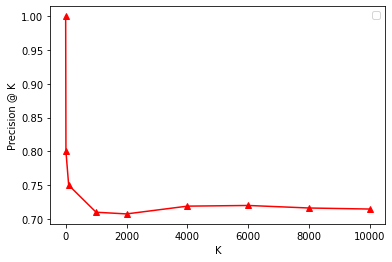

In [125]:
p_at_k = np.array([sum(map(lambda x : x[1], confSorted[:k])) / k for k in K])
plt.plot(K, p_at_k, 'r^-')
plt.xlabel('K')
plt.ylabel('Precision @ K')
plt.legend()
plt.show()